In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from IPython.display import FileLink
import joblib
from flask import Flask, request

In [25]:
# Load the dataset
df = pd.read_csv('city_day.csv')

In [26]:
#Previewing dataset
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [27]:
#General Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [28]:
#Finding Duplicate Data
df[df.duplicated(keep='first')]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket


#### No Duplicates Found

In [29]:
# Check for missing values in columns
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [30]:
#Dropping Column containing maximum NULL value
df=df.drop(['Xylene'],axis=1)

In [31]:
#Filling NULL values with mean 
df['PM2.5'].fillna(df['PM2.5'].mean(), inplace=True)
#Same for all other columns containing NULL values
df['PM10'].fillna(df['PM10'].mean(), inplace=True)
df['NO'].fillna(df['NO'].mean(), inplace=True)
df['NO2'].fillna(df['NO2'].mean(), inplace=True)
df['NOx'].fillna(df['NOx'].mean(), inplace=True)
df['NH3'].fillna(df['NH3'].mean(), inplace=True)
df['CO'].fillna(df['CO'].mean(), inplace=True)
df['SO2'].fillna(df['SO2'].mean(), inplace=True)
df['O3'].fillna(df['O3'].mean(), inplace=True)
df['Benzene'].fillna(df['Benzene'].mean(), inplace=True)
df['Toluene'].fillna(df['Toluene'].mean(), inplace=True)
df['AQI'].fillna(df['AQI'].mean(), inplace=True)

In [32]:
#Filling missing values in a categorical column
mode_value = df['AQI_Bucket'].mode()[0]
df['AQI_Bucket'].fillna(mode_value, inplace=True)

In [33]:
# Re-Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64


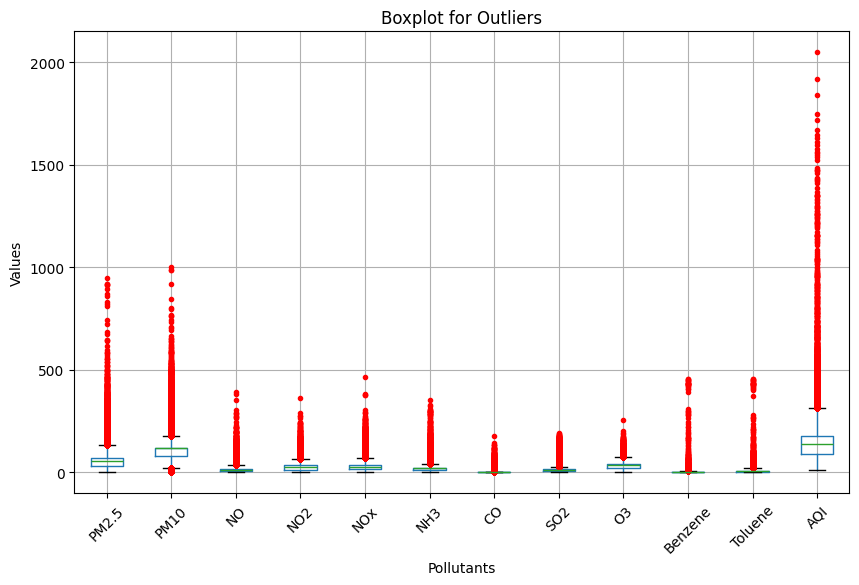

In [34]:
#Identifying Outliers
# Specifying the columns for visualization of outliers
columns_of_interest = ['PM2.5', 'PM10', 'NO', 'NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','AQI']

# Visualization of boxplot for the selected columns
plt.figure(figsize=(10, 6))
df[columns_of_interest].boxplot(sym='r.')
plt.title('Boxplot for Outliers')
plt.xlabel('Pollutants')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [35]:
# Removal of outliers from dataset
columns_to_clean = ['PM2.5','PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO','SO2','O3','Benzene','Toluene','AQI']

for column in columns_to_clean:
    # Calculate the interquartile range (IQR)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

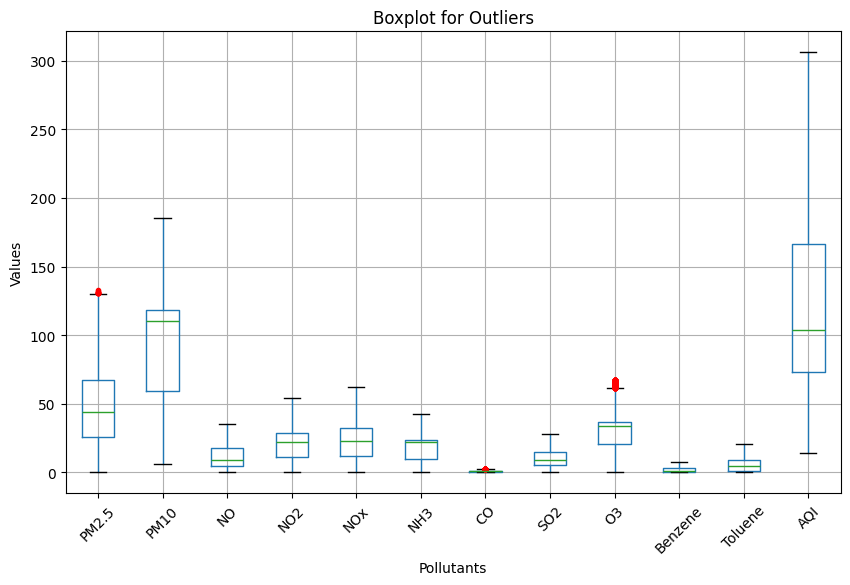

In [36]:
#Re-Checking for outliers
columns_of_interest = ['PM2.5', 'PM10', 'NO', 'NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','AQI']

# Visualization of boxplot for the selected columns
plt.figure(figsize=(10, 6))
df[columns_of_interest].boxplot(sym='r.')
plt.title('Boxplot for Outliers')
plt.xlabel('Pollutants')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [37]:
#Normalization of data using Min-Max Scaler Method
columns_to_normalize = ['PM2.5','PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO','SO2','O3','Benzene','Toluene','AQI'] 

# MinMaxScaler method
scaler = MinMaxScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [38]:
# Perform PCA(Principal Component Analysis) for dimensionality reduction
# Selecting the columns for PCA
columns_for_pca = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']

# Creating a DataFrame with only the selected columns
df_for_pca = df[columns_for_pca]

# Performing PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_for_pca)

# Adding PCA components to the original DataFrame
df['PCA_1'] = pca_result[:, 0]
df['PCA_2'] = pca_result[:, 1]

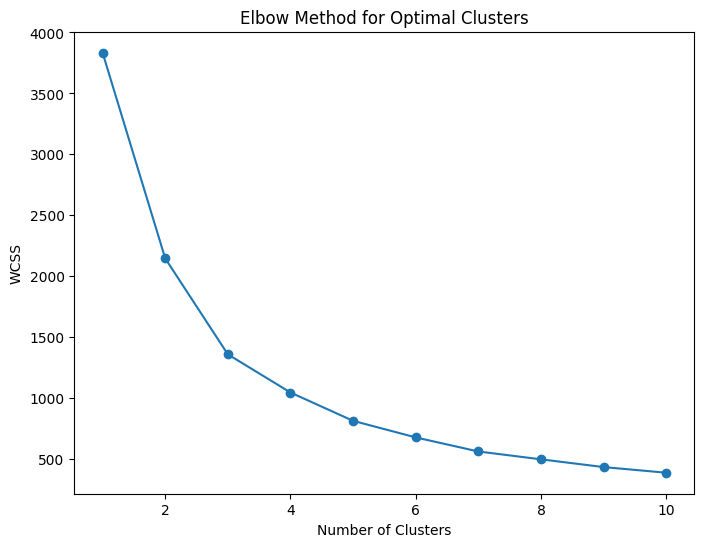

In [39]:
# Applying within-cluster sum of squares (WCSS) method for determining suitable no. of clusters
X = df[['PCA_1', 'PCA_2']]  # Using the appropriate features for clustering

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Value of K obtained through the elbow plot is 3

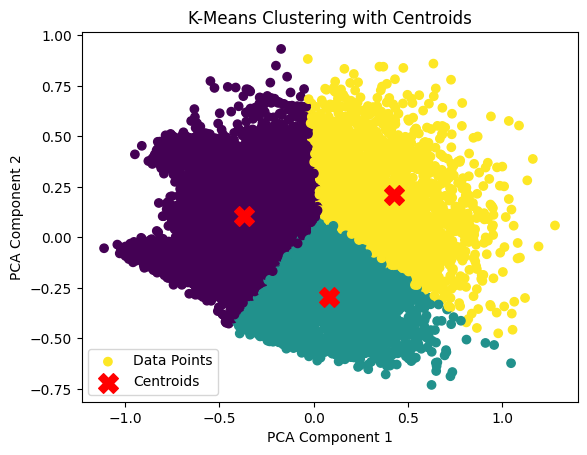

In [40]:
# Perform K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# For cluster centroids
centroids = kmeans.cluster_centers_

# Visualizing the clusters
plt.scatter(df['PCA_1'], df['PCA_2'], c=df['Cluster'], cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [41]:
# Correlation analysis
columns_of_interest = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']
correlation_matrix = df[columns_of_interest].corr()

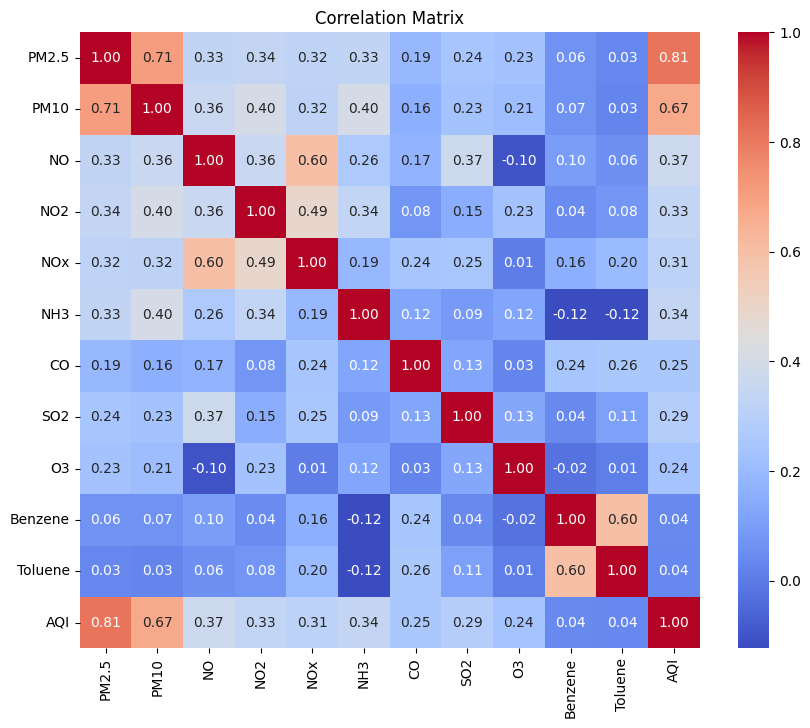

In [42]:
# Display the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [43]:
# Importing Libraries for One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Importing Libraries for Model Building and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge  
from sklearn.metrics import mean_squared_error, r2_score

# Categorical columns that need to be one-hot encoded
categorical_columns = ['City', 'Date', 'AQI_Bucket']

# One-hot encoding for categorical variables
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
], remainder='passthrough')

# Apply the column transformer to encode categorical variables
X_encoded = column_transformer.fit_transform(df.drop(['AQI'], axis=1))
y = df['AQI']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Model Building with Ridge Regression
ridge_regressor = Ridge(random_state=42)
ridge_regressor.fit(X_train, y_train)

# Model Evaluation
y_pred = ridge_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the MSE and R^2 score
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 0.0003064392406354974
R^2 Score: 0.9894193182643365


In [44]:
# Export the model to a .pkl file
# Save the trained ColumnTransformer and RandomForestRegressor to disk
joblib.dump(column_transformer, 'C:/Users/shubh/OneDrive/Desktop/web development/column_transformer.pkl')
joblib.dump(ridge_regressor, 'C:/Users/shubh/OneDrive/Desktop/web development/ridge_regressor.pkl')

['C:/Users/shubh/OneDrive/Desktop/web development/ridge_regressor.pkl']

In [45]:
# Flask web application
from flask import Flask, request, render_template

# Calculate the mean or median for the numerical columns
default_values = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'AQI', 'PCA_1', 'PCA_2']].median()
default_values['AQI_Bucket'] = df['AQI_Bucket'].mode()[0]
most_common_cluster = df['Cluster'].mode()[0]
default_values['Cluster'] = most_common_cluster


app = Flask(__name__)

# Preprocess input data
def preprocess_data(city, date):

    data = {
        'City': [city],
        'Date': [date],
    }

    # Get the input values from the form
    for col in default_values.index:
        if col in request.form:
            data[col] = [request.form[col]]

    # Fill in any missing values with the default values
    for col in default_values.index:
        if col not in data:
            data[col] = [default_values[col]]

    # Create a DataFrame from the input
    df = pd.DataFrame(data)

    # Load the column transformer you saved earlier
    column_transformer = joblib.load('C:/Users/shubh/OneDrive/Desktop/web development/column_transformer.pkl')

    # Transform the input data using the loaded column transformer
    X_encoded = column_transformer.transform(df)

    return X_encoded

@app.route('/', methods=['GET', 'POST'])
def index():
    # print("Index function called")
    if request.method == 'POST':
        # Extract data from form
        city = request.form['city']
        date = request.form['date']
        print(f"Received city: {city}, date: {date}")  # Debug print
        # Preprocess the data
        preprocessed_data = preprocess_data(city, date)
        print(f"Preprocessed data: {preprocessed_data}")  # Debug print

        # Load the trained RidgeRegressor
        ridge_regressor = joblib.load('C:/Users/shubh/OneDrive/Desktop/web development/ridge_regressor.pkl')

        # Predict the AQI
        prediction = ridge_regressor.predict(preprocessed_data)
        print(f"Prediction: {prediction[0]}")  # Debug print

        
        # Render the result
        return render_template('index.html', prediction=prediction[0])

    # GET request returns the form page
    return render_template('index.html')

if __name__ == '__main__':  
    app.run(debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [21/Feb/2024 23:44:40] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Feb/2024 23:44:49] "POST / HTTP/1.1" 200 -


Received city: mumbai, date: 2024-02-21
Preprocessed data:   (0, 2035)	1.0
  (0, 2039)	0.3308684826077115
  (0, 2040)	0.5805410219303129
  (0, 2041)	0.26545143833665624
  (0, 2042)	0.404176677139161
  (0, 2043)	0.3636803093780212
  (0, 2044)	0.5292872265349329
  (0, 2045)	0.2789855072463769
  (0, 2046)	0.3047272727272727
  (0, 2047)	0.5029673590504451
  (0, 2048)	0.15297092288242728
  (0, 2049)	0.21215090641842235
  (0, 2050)	-0.008008639929635384
  (0, 2051)	-0.015079228304768839
Prediction: 0.213080171006931


127.0.0.1 - - [21/Feb/2024 23:44:59] "POST / HTTP/1.1" 200 -


Received city: mumbai, date: 2024-03-09
Preprocessed data:   (0, 2035)	1.0
  (0, 2039)	0.3308684826077115
  (0, 2040)	0.5805410219303129
  (0, 2041)	0.26545143833665624
  (0, 2042)	0.404176677139161
  (0, 2043)	0.3636803093780212
  (0, 2044)	0.5292872265349329
  (0, 2045)	0.2789855072463769
  (0, 2046)	0.3047272727272727
  (0, 2047)	0.5029673590504451
  (0, 2048)	0.15297092288242728
  (0, 2049)	0.21215090641842235
  (0, 2050)	-0.008008639929635384
  (0, 2051)	-0.015079228304768839
Prediction: 0.213080171006931


127.0.0.1 - - [21/Feb/2024 23:45:11] "POST / HTTP/1.1" 200 -


Received city: mumbai, date: 2024-12-31
Preprocessed data:   (0, 2035)	1.0
  (0, 2039)	0.3308684826077115
  (0, 2040)	0.5805410219303129
  (0, 2041)	0.26545143833665624
  (0, 2042)	0.404176677139161
  (0, 2043)	0.3636803093780212
  (0, 2044)	0.5292872265349329
  (0, 2045)	0.2789855072463769
  (0, 2046)	0.3047272727272727
  (0, 2047)	0.5029673590504451
  (0, 2048)	0.15297092288242728
  (0, 2049)	0.21215090641842235
  (0, 2050)	-0.008008639929635384
  (0, 2051)	-0.015079228304768839
Prediction: 0.213080171006931


127.0.0.1 - - [21/Feb/2024 23:45:22] "POST / HTTP/1.1" 200 -


Received city: New York, date: 2024-10-31
Preprocessed data:   (0, 2035)	1.0
  (0, 2039)	0.3308684826077115
  (0, 2040)	0.5805410219303129
  (0, 2041)	0.26545143833665624
  (0, 2042)	0.404176677139161
  (0, 2043)	0.3636803093780212
  (0, 2044)	0.5292872265349329
  (0, 2045)	0.2789855072463769
  (0, 2046)	0.3047272727272727
  (0, 2047)	0.5029673590504451
  (0, 2048)	0.15297092288242728
  (0, 2049)	0.21215090641842235
  (0, 2050)	-0.008008639929635384
  (0, 2051)	-0.015079228304768839
Prediction: 0.213080171006931


127.0.0.1 - - [21/Feb/2024 23:45:33] "POST / HTTP/1.1" 200 -


Received city: akurdi, date: 2024-03-01
Preprocessed data:   (0, 2035)	1.0
  (0, 2039)	0.3308684826077115
  (0, 2040)	0.5805410219303129
  (0, 2041)	0.26545143833665624
  (0, 2042)	0.404176677139161
  (0, 2043)	0.3636803093780212
  (0, 2044)	0.5292872265349329
  (0, 2045)	0.2789855072463769
  (0, 2046)	0.3047272727272727
  (0, 2047)	0.5029673590504451
  (0, 2048)	0.15297092288242728
  (0, 2049)	0.21215090641842235
  (0, 2050)	-0.008008639929635384
  (0, 2051)	-0.015079228304768839
Prediction: 0.213080171006931


127.0.0.1 - - [21/Feb/2024 23:45:48] "POST / HTTP/1.1" 200 -


Received city: Banglore, date: 2024-02-14
Preprocessed data:   (0, 2035)	1.0
  (0, 2039)	0.3308684826077115
  (0, 2040)	0.5805410219303129
  (0, 2041)	0.26545143833665624
  (0, 2042)	0.404176677139161
  (0, 2043)	0.3636803093780212
  (0, 2044)	0.5292872265349329
  (0, 2045)	0.2789855072463769
  (0, 2046)	0.3047272727272727
  (0, 2047)	0.5029673590504451
  (0, 2048)	0.15297092288242728
  (0, 2049)	0.21215090641842235
  (0, 2050)	-0.008008639929635384
  (0, 2051)	-0.015079228304768839
Prediction: 0.213080171006931


127.0.0.1 - - [21/Feb/2024 23:46:48] "POST / HTTP/1.1" 200 -


Received city: Mumbai, date: 2024-02-01
Preprocessed data:   (0, 20)	1.0
  (0, 2035)	1.0
  (0, 2039)	0.3308684826077115
  (0, 2040)	0.5805410219303129
  (0, 2041)	0.26545143833665624
  (0, 2042)	0.404176677139161
  (0, 2043)	0.3636803093780212
  (0, 2044)	0.5292872265349329
  (0, 2045)	0.2789855072463769
  (0, 2046)	0.3047272727272727
  (0, 2047)	0.5029673590504451
  (0, 2048)	0.15297092288242728
  (0, 2049)	0.21215090641842235
  (0, 2050)	-0.008008639929635384
  (0, 2051)	-0.015079228304768839
Prediction: 0.22170784636752972


127.0.0.1 - - [21/Feb/2024 23:47:01] "POST / HTTP/1.1" 200 -


Received city: New York, date: 2024-11-11
Preprocessed data:   (0, 2035)	1.0
  (0, 2039)	0.3308684826077115
  (0, 2040)	0.5805410219303129
  (0, 2041)	0.26545143833665624
  (0, 2042)	0.404176677139161
  (0, 2043)	0.3636803093780212
  (0, 2044)	0.5292872265349329
  (0, 2045)	0.2789855072463769
  (0, 2046)	0.3047272727272727
  (0, 2047)	0.5029673590504451
  (0, 2048)	0.15297092288242728
  (0, 2049)	0.21215090641842235
  (0, 2050)	-0.008008639929635384
  (0, 2051)	-0.015079228304768839
Prediction: 0.213080171006931


127.0.0.1 - - [21/Feb/2024 23:48:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Feb/2024 23:48:18] "POST / HTTP/1.1" 200 -


Received city: Mumbai, date: 2024-11-11
Preprocessed data:   (0, 20)	1.0
  (0, 2035)	1.0
  (0, 2039)	0.3308684826077115
  (0, 2040)	0.5805410219303129
  (0, 2041)	0.26545143833665624
  (0, 2042)	0.404176677139161
  (0, 2043)	0.3636803093780212
  (0, 2044)	0.5292872265349329
  (0, 2045)	0.2789855072463769
  (0, 2046)	0.3047272727272727
  (0, 2047)	0.5029673590504451
  (0, 2048)	0.15297092288242728
  (0, 2049)	0.21215090641842235
  (0, 2050)	-0.008008639929635384
  (0, 2051)	-0.015079228304768839
Prediction: 0.22170784636752972


127.0.0.1 - - [21/Feb/2024 23:48:38] "POST / HTTP/1.1" 200 -


Received city: New York, date: 2028-10-11
Preprocessed data:   (0, 2035)	1.0
  (0, 2039)	0.3308684826077115
  (0, 2040)	0.5805410219303129
  (0, 2041)	0.26545143833665624
  (0, 2042)	0.404176677139161
  (0, 2043)	0.3636803093780212
  (0, 2044)	0.5292872265349329
  (0, 2045)	0.2789855072463769
  (0, 2046)	0.3047272727272727
  (0, 2047)	0.5029673590504451
  (0, 2048)	0.15297092288242728
  (0, 2049)	0.21215090641842235
  (0, 2050)	-0.008008639929635384
  (0, 2051)	-0.015079228304768839
Prediction: 0.213080171006931


127.0.0.1 - - [21/Feb/2024 23:48:55] "POST / HTTP/1.1" 200 -


Received city: Banglore, date: 2025-01-06
Preprocessed data:   (0, 2035)	1.0
  (0, 2039)	0.3308684826077115
  (0, 2040)	0.5805410219303129
  (0, 2041)	0.26545143833665624
  (0, 2042)	0.404176677139161
  (0, 2043)	0.3636803093780212
  (0, 2044)	0.5292872265349329
  (0, 2045)	0.2789855072463769
  (0, 2046)	0.3047272727272727
  (0, 2047)	0.5029673590504451
  (0, 2048)	0.15297092288242728
  (0, 2049)	0.21215090641842235
  (0, 2050)	-0.008008639929635384
  (0, 2051)	-0.015079228304768839
Prediction: 0.213080171006931
